# Diabetes

## Importing data

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation Matrix

<Axes: >

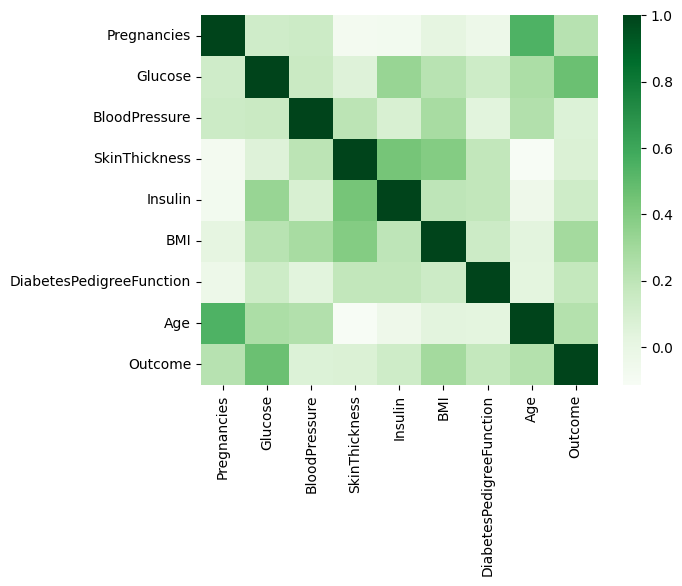

In [33]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='Greens')

## Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
X = df.drop('Outcome',axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Splitting data into train and test sets

In [6]:
from sklearn.model_selection import train_test_split
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Linear SVM

In [14]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1,loss='hinge',dual='auto',max_iter=10000)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(f'Accuracy for Linear SVM: {(score*100).__round__(3)}%')

Accuracy for Linear SVM: 72.917%


## Non Linear SVM

### Polynomial Kernel

In [37]:
from sklearn.svm import SVC
clf = SVC(kernel='poly',degree=3,coef0=1,C=5)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(f'Accuracy for Polynomial Kernel: {(score*100).__round__(3)}%')

Accuracy for Polynomial Kernel: 73.438%


### Gaussian RBF Kernel

In [39]:
clf = SVC(kernel='rbf',gamma=0.1,C=1)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(f'Accuracy for Gaussian RBF Kernel: {(score*100).__round__(3)}%')

Accuracy for Gaussian RBF Kernel: 74.479%


## Evaluating Gaussian RBF Kernel

### Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

array([[103,  20],
       [ 29,  40]], dtype=int64)

### LogLoss

In [41]:
from sklearn.metrics import log_loss
log_loss(y_test,clf.predict(X_test))

9.19864070868094